In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as prd
import matplotlib.pyplot as plt

In [2]:
companies = ['BRK.A','WMT','MSFT','MS']
stockData = pd.DataFrame()
for cmpny in companies:
    stockData[cmpny] = prd.DataReader(cmpny,data_source='google',start='1995-1-1')['Close']

In [3]:
stockData.head()

,BRK.A,WMT,MSFT,MS
Date,,,,
2001-08-13,69500.0,52.20,32.92,46.10
2001-08-14,69100.0,52.36,32.34,46.19
2001-08-15,69600.0,52.00,31.60,45.44
2001-08-16,69550.0,51.69,32.31,43.83
2001-08-17,69200.0,50.80,30.94,42.34


# Normalization of data

In [4]:
stockData/stockData.iloc[0]*100

,BRK.A,WMT,MSFT,MS
Date,,,,
2001-08-13,100.000000,100.000000,100.000000,100.000000
2001-08-14,99.424460,100.306513,98.238153,100.195228
2001-08-15,100.143885,99.616858,95.990279,98.568330
2001-08-16,100.071942,99.022989,98.147023,95.075922
2001-08-17,99.568345,97.318008,93.985419,91.843818
2001-08-20,100.705036,98.831418,95.230863,95.553145
2001-08-21,100.431655,95.670498,92.314702,93.991323
2001-08-22,100.705036,96.245211,92.132442,95.943601
2001-08-23,100.575540,95.287356,89.793439,94.164859


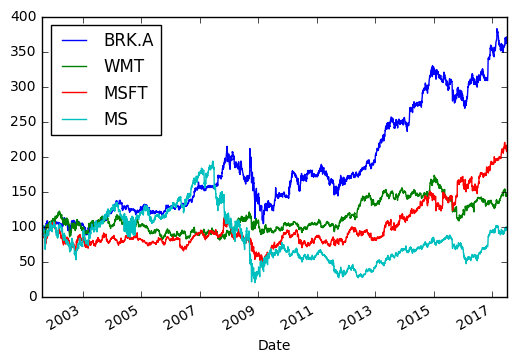

In [5]:
(stockData/stockData.iloc[0]*100).plot()
plt.show()

# Portfolio return Calculation(suppose investment percentage is [40,20,30,10])

In [6]:
proportion = np.array([.4,.2,.3,.1])
returns = (stockData/stockData.shift(1)) - 1
returns.head()

,BRK.A,WMT,MSFT,MS
Date,,,,
2001-08-13,NaN,NaN,NaN,NaN
2001-08-14,-0.005755,0.003065,-0.017618,0.001952
2001-08-15,0.007236,-0.006875,-0.022882,-0.016237
2001-08-16,-0.000718,-0.005962,0.022468,-0.035431
2001-08-17,-0.005032,-0.017218,-0.042402,-0.033995


In [7]:
annualReturns = returns.mean()*250 #annual returns(*250 -- Working)
annualReturns

BRK.A    0.103366
WMT      0.043609
MSFT     0.085390
MS       0.172455
dtype: float64

In [9]:
totalReturn = np.dot(annualReturns,proportion)*100
print(totalReturn,'%')

9.29305550435 %
